## ML - Classification project - 1/Complete Workflow 

### Loading Packages

In [129]:
import pandas as pd
import numpy as np  # for mathematical calculations
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt  # for plotting graphs
%matplotlib inline
import warnings     # To ignore any warnings
warnings.filterwarnings('ignore')

In [130]:
train = pd.read_csv('../data/loan_sanction_train.csv')
test = pd.read_csv('../data/loan_sanction_test.csv')

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [131]:
train_original = train.copy()
test_original = test.copy()

In [132]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [133]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [134]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [135]:
train.shape,test.shape

((614, 13), (367, 12))

In [136]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [137]:
# Normalize can be set to True to print proportions instead of number

train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

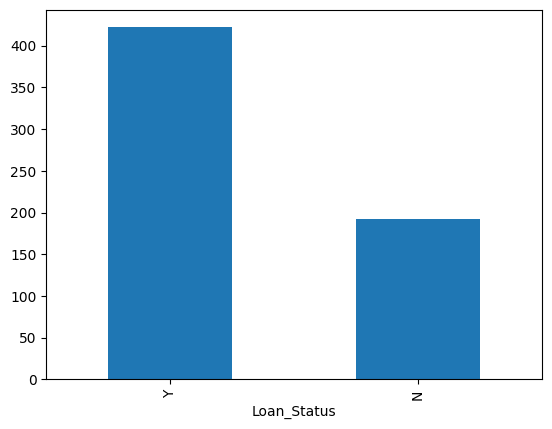

In [138]:
train['Loan_Status'].value_counts().plot.bar()

### 6. Independent Variable (Categorical)

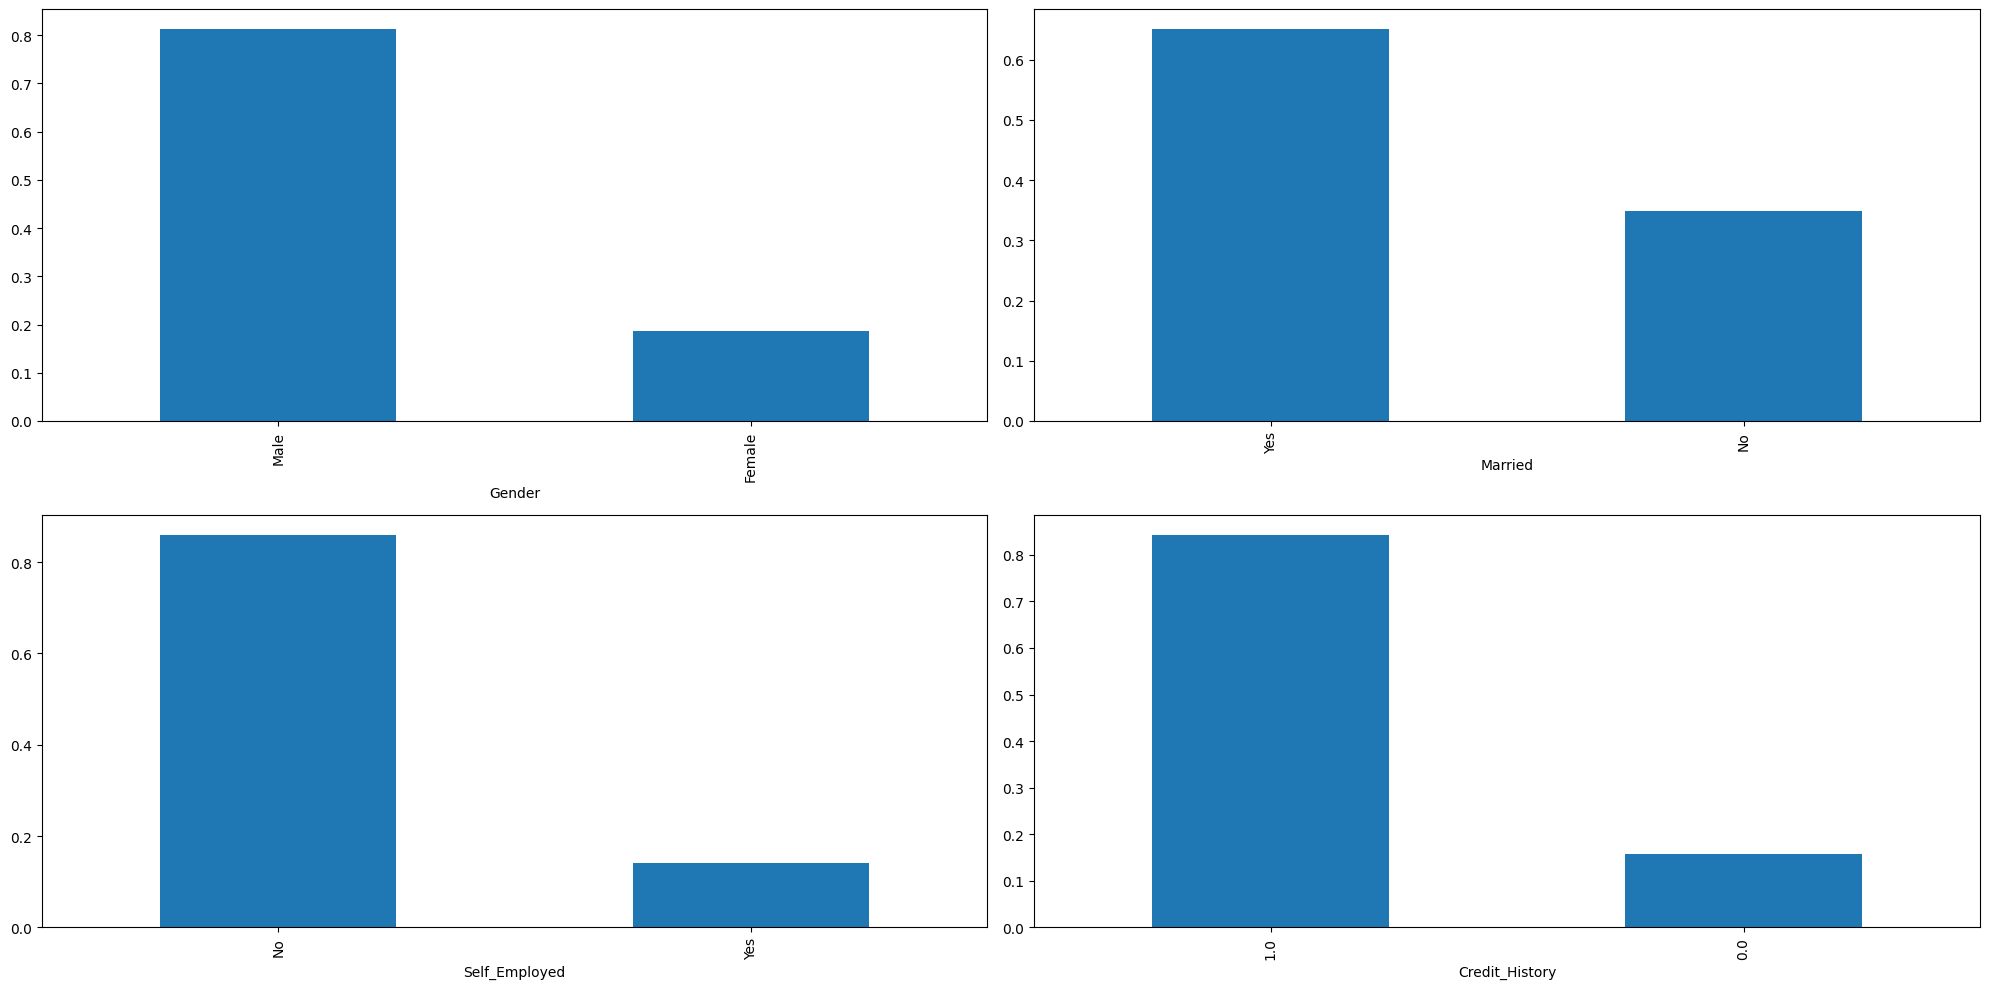

In [139]:
plt.figure(figsize=(20,10))

plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar()


plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar()


plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar()

plt.subplot(224)


train['Credit_History'].value_counts(normalize=True).plot.bar()
plt.tight_layout()

plt.show()


### 7. Independent Variable(Ordinal)


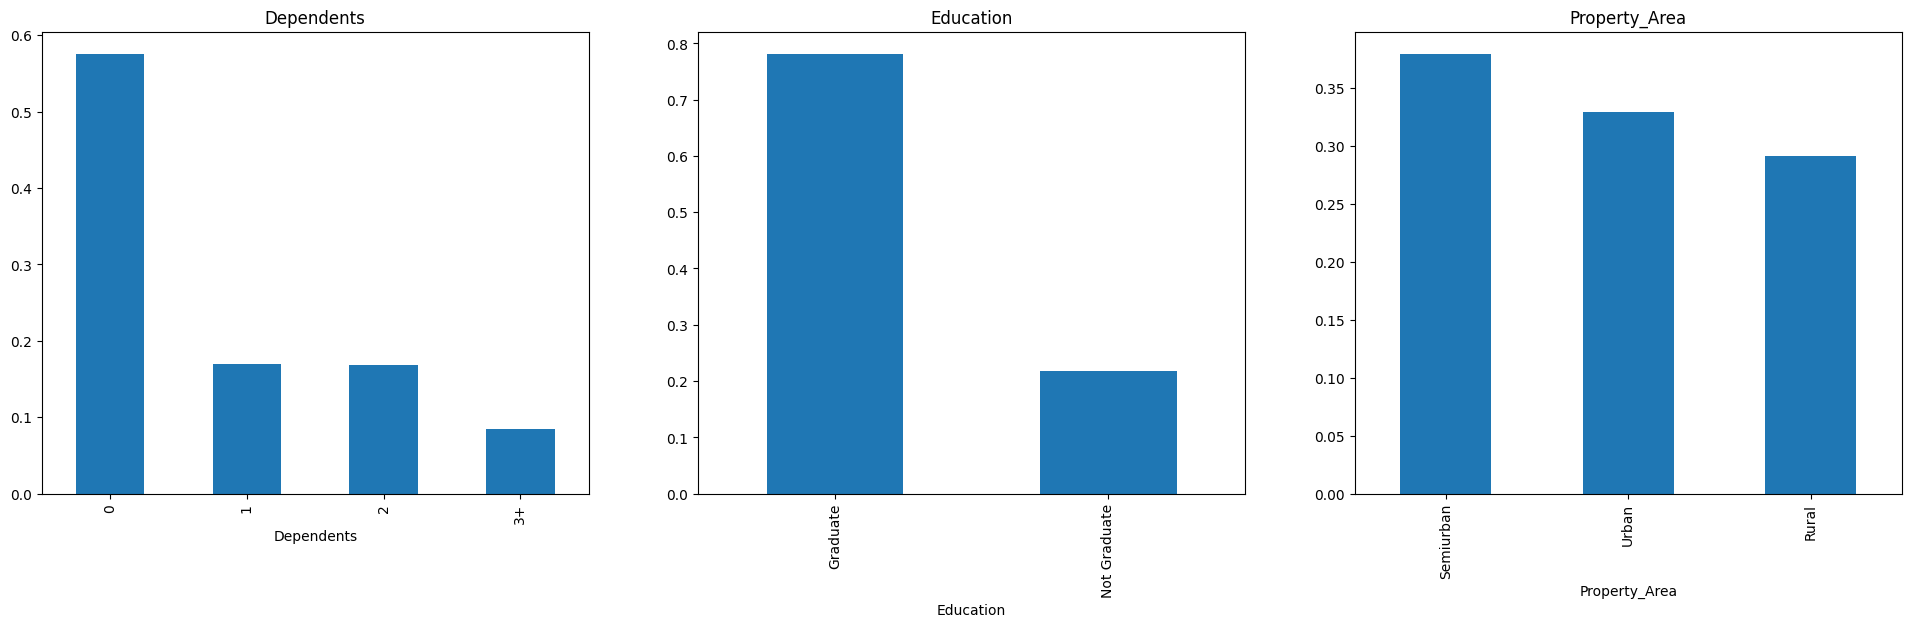

In [140]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')


plt.show()

### 8. Independent Variable (Numerical)


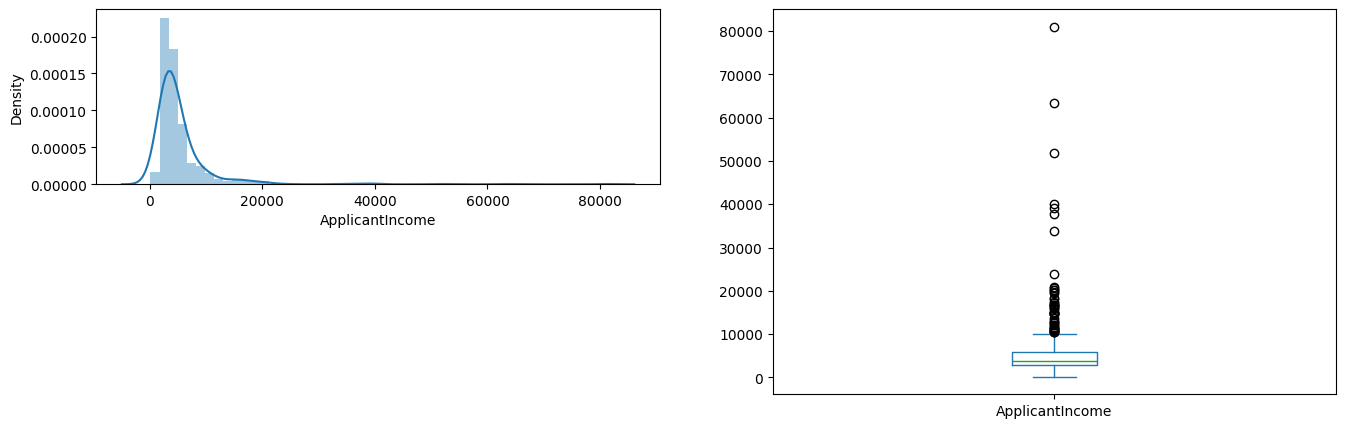

In [141]:
plt.figure(1)
plt.subplot(221)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

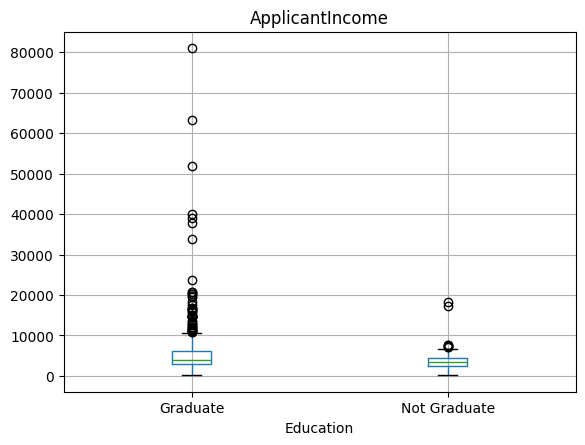

In [142]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

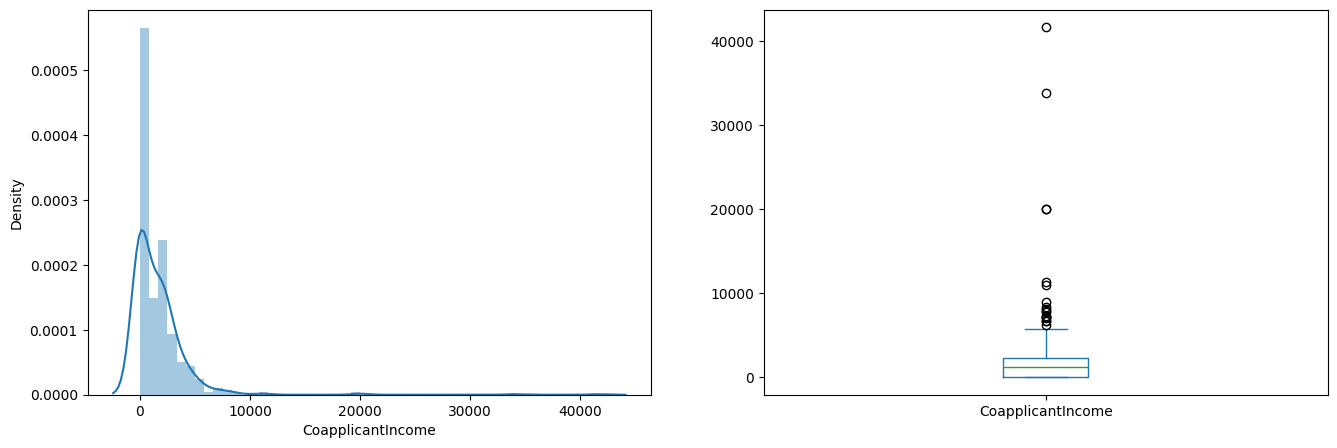

In [143]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

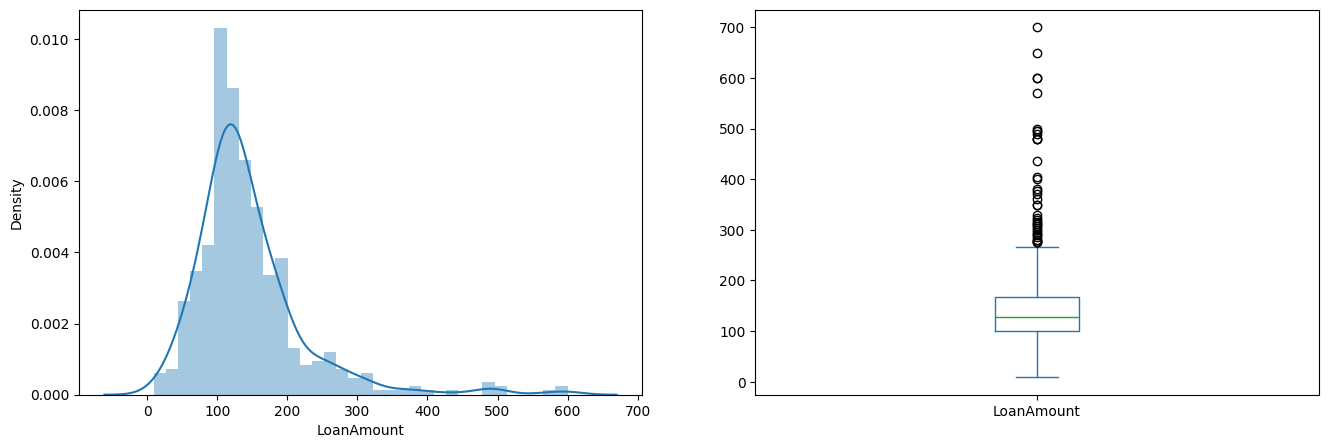

In [144]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()


#### 9. Categorical Independent Variable v/s Target Variable


<Axes: xlabel='Gender'>

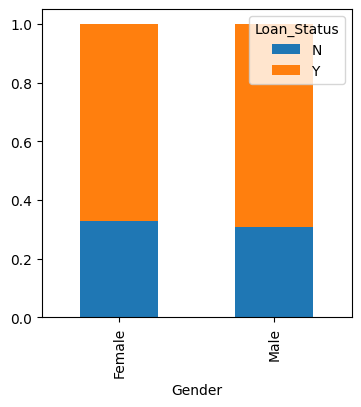

In [145]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

In [146]:
Gender.div(Gender.sum(1).astype(float), axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


In [147]:
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


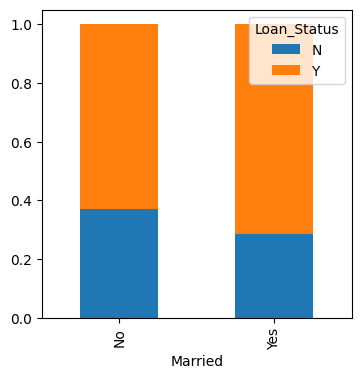

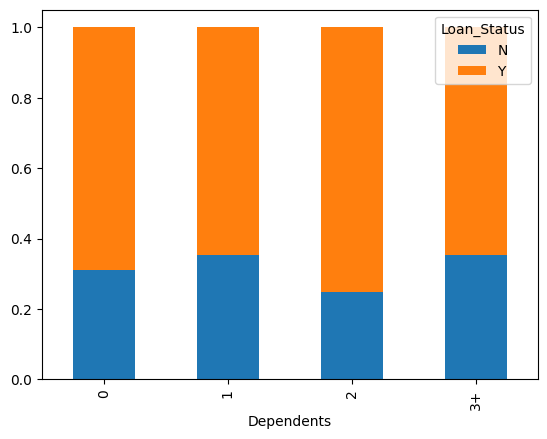

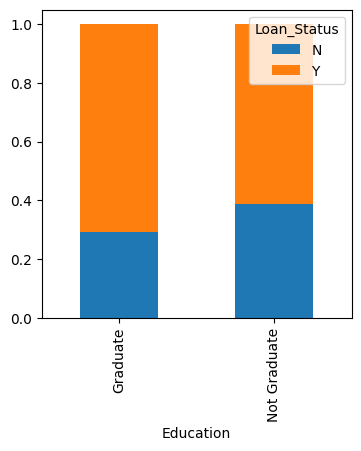

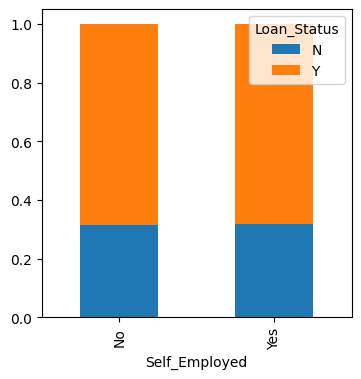

In [148]:
Married   = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents= pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'], train['Loan_Status'])

Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
                  
                
                  

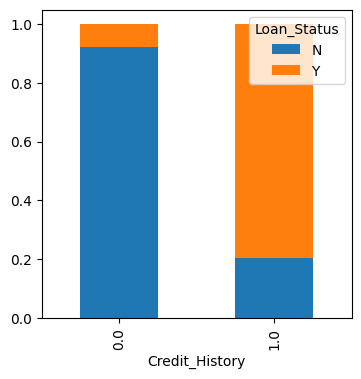

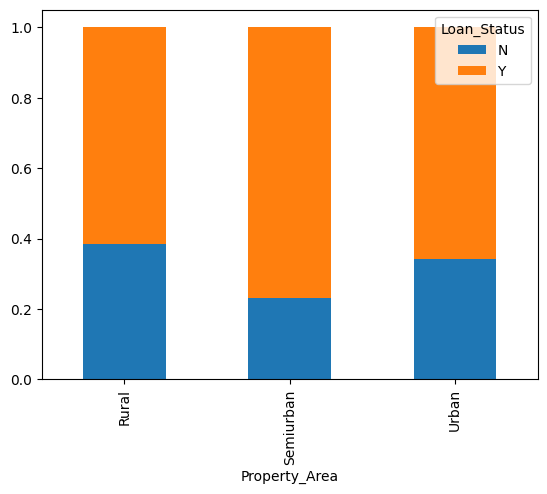

In [149]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

## 10. Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.


<Axes: xlabel='Loan_Status'>

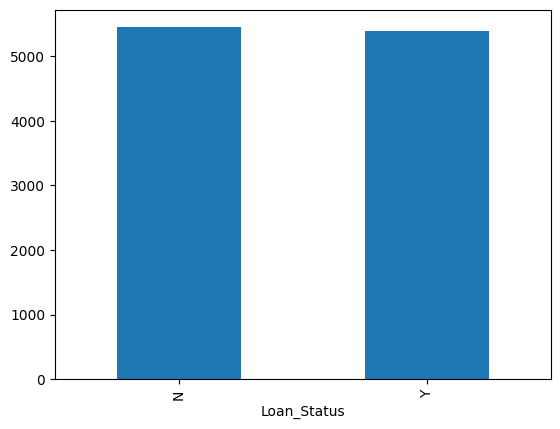

In [150]:
train.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar()

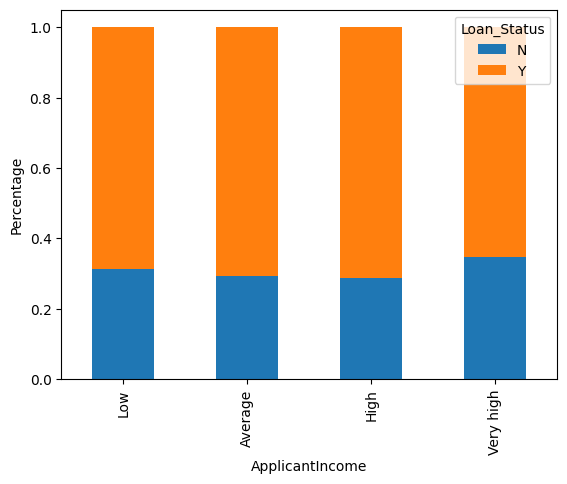

In [151]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very high']
train['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.xlabel('ApplicantIncome')
p = plt.ylabel('Percentage')

##### We will analyze the coapplicant income and loan amount variable in similar manner.

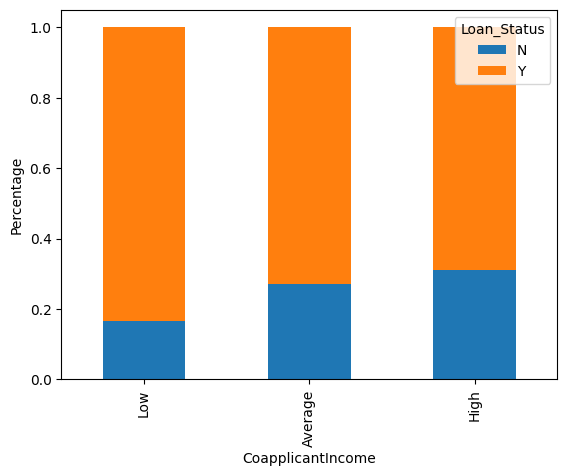

In [152]:
bins = [0,1000,3000,42000]
group = ['Low', 'Average', 'High']

train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'], bins, labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total_Income on the Loan_Status.

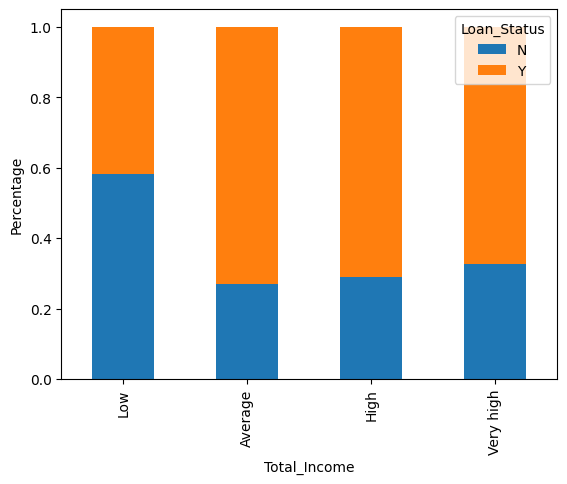

In [153]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average','High','Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels = group)


Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.xlabel('Total_Income')
p = plt.ylabel('Percentage')

Let’s visualize the Loan amount variable.

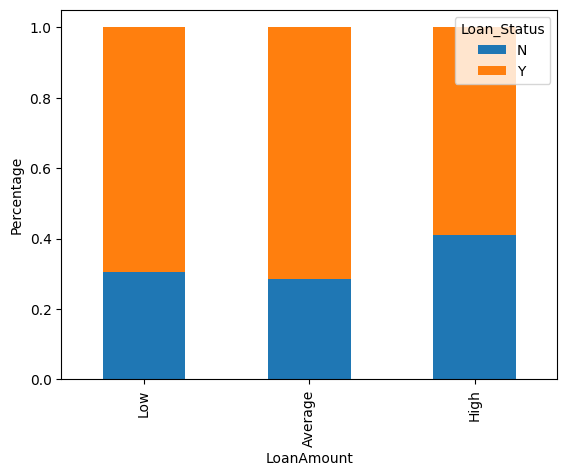

In [154]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

##### Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.



In [155]:
train = train.drop([col for col in ['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'] if col in train.columns], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.



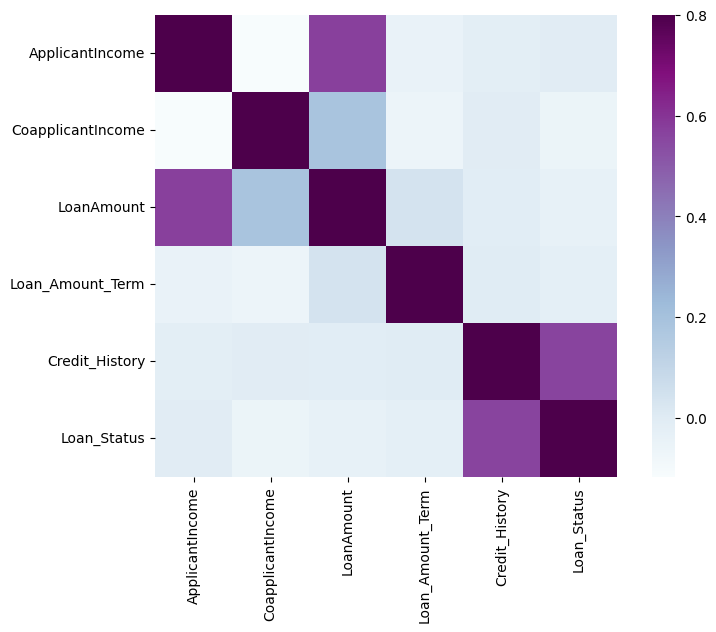

In [156]:
matrix = train.select_dtypes(include='number').corr()
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

### 11. Missing value imputation


Let’s list out feature-wise count of missing values.



In [157]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [158]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [159]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [160]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [161]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [162]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [163]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

## 12. Outlier Treatment


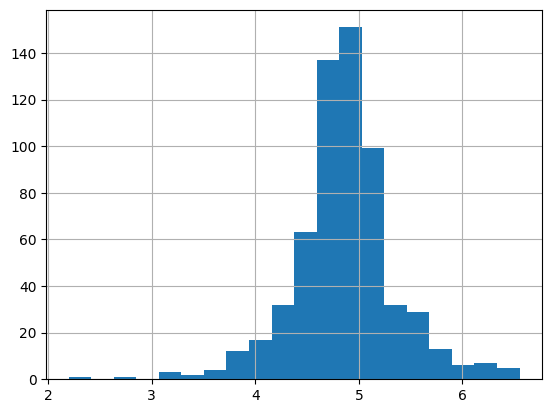

In [164]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

## 13. Evaluation Metrics


In [165]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [166]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']


In [167]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [168]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [169]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression()

In [170]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7891891891891892

In [171]:
pred_test = model.predict(test)

In [172]:
from sklearn.model_selection import StratifiedKFold

In [173]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


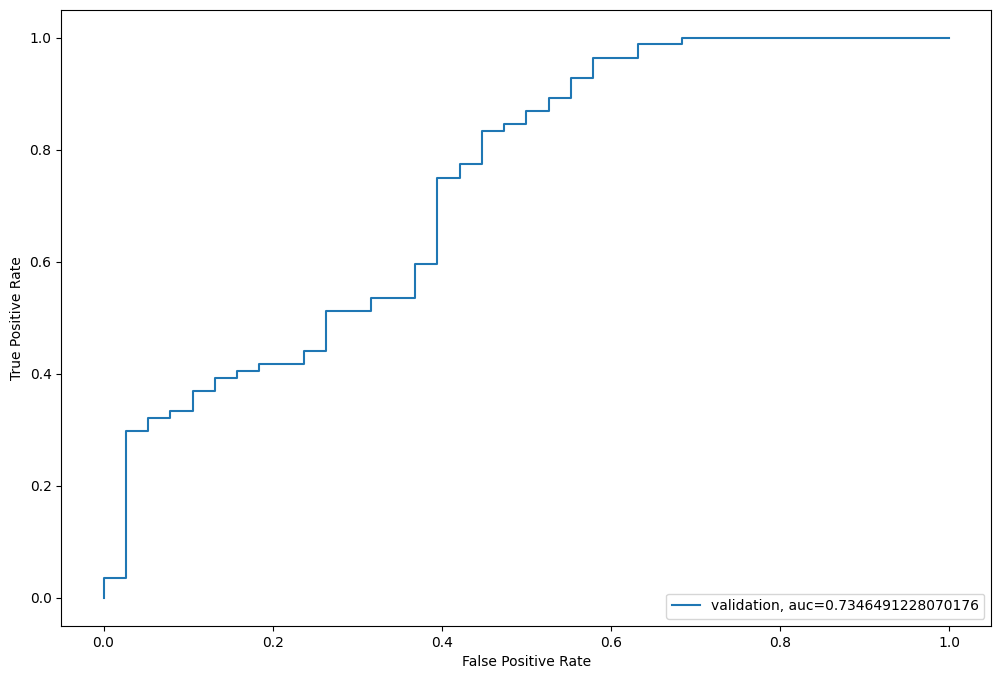

In [174]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)


plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [175]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

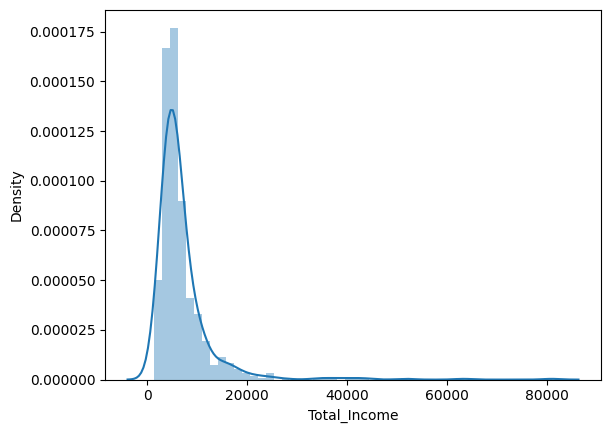

In [176]:
sns.distplot(train["Total_Income"]);

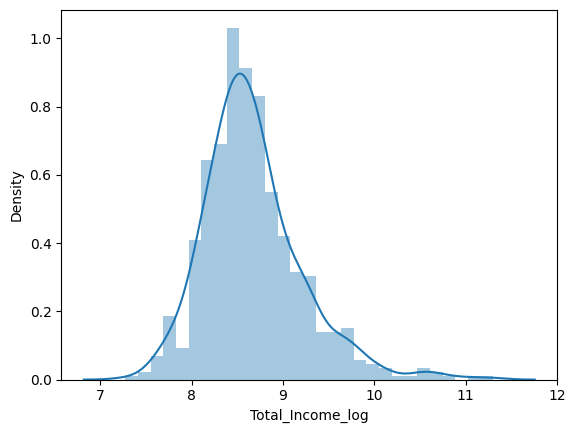

In [177]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s create the EMI feature now.



In [178]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/train['Loan_Amount_Term']

Let’s check the distribution of EMI variable.


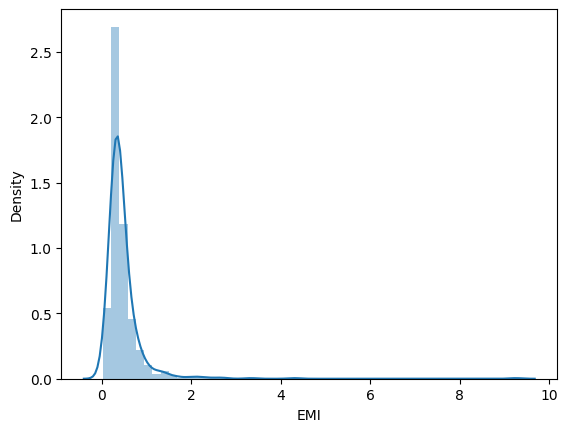

In [179]:
sns.distplot(train['EMI']);

Let us create Balance Income feature now and check its distribution.



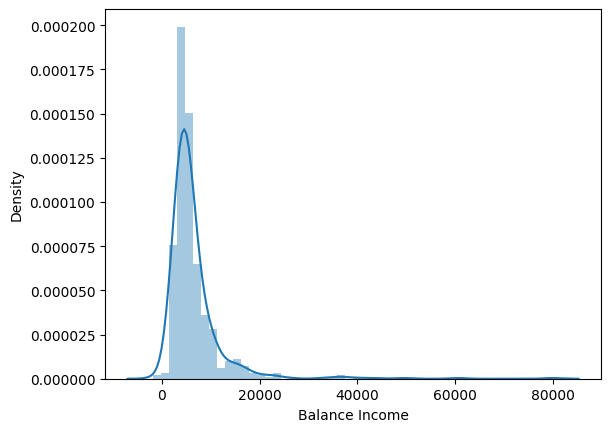

In [180]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income']);

In [181]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest and XGBoost.

We will build the following models in this section.

* Random Forest

* Logistic Regression

* Decision Tree

* XGBoost

Let’s prepare the data for feeding into the models.



In [182]:
x = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

## 14. Algorithms

#### Logistic Regression


In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))

    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = LogisticRegression(random_state=1, max_iter=1000)
    model.fit(xtr, ytr)

    pred_val = model.predict(xvl)
    score = accuracy_score(yvl, pred_val)
    print('accuracy_score', score)

    i += 1

# ✅ Align test set to training features
test_aligned = test.reindex(columns=X.columns, fill_value=0)

# ✅ Predict on test data
pred_test = model.predict(test_aligned)
pred = model.predict_proba(xvl)[:, 1]



1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8211382113821138

5 of kfold 5
accuracy_score 0.7950819672131147


### Decision Tree


In [191]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)

    pred_val = model.predict(xvl)
    score = accuracy_score(yvl, pred_val)
    print('accuracy_score', score)
    
    i += 1

# ✅ Align test set columns to match training data
test_aligned = test.reindex(columns=X.columns, fill_value=0)

# ✅ Predict on test set
pred_test = model.predict(test_aligned)



1 of kfold 5
accuracy_score 0.6991869918699187

2 of kfold 5
accuracy_score 0.7398373983739838

3 of kfold 5
accuracy_score 0.7154471544715447

4 of kfold 5
accuracy_score 0.7235772357723578

5 of kfold 5
accuracy_score 0.6721311475409836


In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)

    pred_val = model.predict(xvl)
    score = accuracy_score(yvl, pred_val)
    print('accuracy_score', score)
    
    i += 1

# ✅ Align test features with training features
test_aligned = test.reindex(columns=X.columns, fill_value=0)

# ✅ Final prediction on test set
pred_test = model.predict(test_aligned)



1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.7540983606557377


In [128]:
from sklearn.model_selection import GridSearchCV

# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

# Fit the grid search model 
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [195]:
# Estimating the optimized value 
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=41, random_state=1)

So, the optimized value for the max_depth variable is 3 and for n_estimator is 41. Now let’s build the model using these optimized values.



In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr, ytr)

    pred_val = model.predict(xvl)
    score = accuracy_score(yvl, pred_val)
    print('accuracy_score', score)
    
    i += 1

# ✅ Align test set with training columns
test_aligned = test.reindex(columns=X.columns, fill_value=0)

# ✅ Make predictions on aligned test set
pred_test = model.predict(test_aligned)
pred2 = model.predict_proba(test_aligned)[:, 1]



1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.7950819672131147


### XGBOOST
XGBoost is a fast and efficient algorithm and has been used to by the winners of many data science competitions. It’s a boosting algorithm and you may refer this article to know more about boosting. XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables. Let’s have a look at the parameters that we are going to use in our model.

n_estimator: This specifies the number of trees for the model.

max_depth: We can specify maximum depth of a tree using this parameter.

In [200]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 2.2 MB/s eta 0:01:07
   ---------------------------------------- 1.8/150.0 MB 3.1 MB/s eta 0:00:48
    --------------------------------------- 2.9/150.0 MB 3.6 MB/s eta 0:00:41
    --------------------------------------- 3.7/150.0 MB 3.8 MB/s eta 0:00:39
   - -------------------------------------- 4.7/150.0 MB 3.9 MB/s eta 0:00:38
   - -------------------------------------- 5.8/150.0 MB 4.1 MB/s eta 0:00:36
   - -------------------------------------- 6.3/150.0 MB 3.9 MB/s eta 0:00:38
   - -------------------------------------- 7.3/150.0 MB 3.9 MB/s eta 0:00:37
   -- ------------------------------------- 8.4/150.0 MB 4.0 MB/s eta 0:00:36
   -- ------------------------------------- 9.2/150.0 MB 4.0 MB/s eta 0:00:35
   -- -


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [202]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))

    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = XGBClassifier(n_estimators=50, max_depth=4, use_label_encoder=False, eval_metric='logloss')
    model.fit(xtr, ytr)

    pred_val = model.predict(xvl)
    score = accuracy_score(yvl, pred_val)
    print('accuracy_score', score)

    i += 1

# ✅ Align test features with training columns
test_aligned = test.reindex(columns=X.columns, fill_value=0)

# ✅ Final predictions
pred_test = model.predict(test_aligned)
pred3 = model.predict_proba(test_aligned)[:, 1]



1 of kfold 5
accuracy_score 0.7967479674796748

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7560975609756098

5 of kfold 5
accuracy_score 0.7459016393442623


## * Interpretation:
The model with the higher mean accuracy is performing better in this cross-validation setup.

XGBoost often performs better on structured/tabular data, but not always — RandomForest can be competitive and faster.